In [65]:
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
import cv2
from collections import Counter

from tensorflow.keras.preprocessing import image
import sys
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report, roc_auc_score

In [29]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'E:/Nour_/self-study/sirusAI_task2/Data/Original/test',
  image_size=(224, 224),
  batch_size=500,
  label_mode='categorical'
)

Found 500 files belonging to 100 classes.


In [30]:
model = tf.keras.models.load_model('E:/Nour_/self-study/sirusAI_task2/Models/ResNet50_FineTuning_SportsClassification.h5')

In [31]:
SportsDictionary = {0: 'air hockey',
                    1: 'ampute football',
                    2: 'archery',
                    3: 'arm wrestling',
                    4: 'axe throwing',
                    5: 'balance beam',
                    6: 'barell racing',
                    7: 'baseball',
                    8: 'basketball',
                    9: 'baton twirling',
                    10: 'bike polo',
                    11: 'billiards',
                    12: 'bmx',
                    13: 'bobsled',
                    14: 'bowling',
                    15: 'boxing',
                    16: 'bull riding',
                    17: 'bungee jumping',
                    18: 'canoe slamon',
                    19: 'cheerleading',
                    20: 'chuckwagon racing',
                    21: 'cricket',
                    22: 'croquet',
                    23: 'curling',
                    24: 'disc golf',
                    25: 'fencing',
                    26: 'field hockey',
                    27: 'figure skating men',
                    28: 'figure skating pairs',
                    29: 'figure skating women',
                    30: 'fly fishing',
                    31: 'football',
                    32: 'formula 1 racing',
                    33: 'frisbee',
                    34: 'gaga',
                    35: 'giant slalom',
                    36: 'golf',
                    37: 'hammer throw',
                    38: 'hang gliding',
                    39: 'harness racing',
                    40: 'high jump',
                    41: 'hockey',
                    42: 'horse jumping',
                    43: 'horse racing',
                    44: 'horseshoe pitching',
                    45: 'hurdles',
                    46: 'hydroplane racing',
                    47: 'ice climbing',
                    48: 'ice yachting',
                    49: 'jai alai',
                    50: 'javelin',
                    51: 'jousting',
                    52: 'judo',
                    53: 'lacrosse',
                    54: 'log rolling',
                    55: 'luge',
                    56: 'motorcycle racing',
                    57: 'mushing',
                    58: 'nascar racing',
                    59: 'olympic wrestling',
                    60: 'parallel bar',
                    61: 'pole climbing',
                    62: 'pole dancing',
                    63: 'pole vault',
                    64: 'polo',
                    65: 'pommel horse',
                    66: 'rings',
                    67: 'rock climbing',
                    68: 'roller derby',
                    69: 'rollerblade racing',
                    70: 'rowing',
                    71: 'rugby',
                    72: 'sailboat racing',
                    73: 'shot put',
                    74: 'shuffleboard',
                    75: 'sidecar racing',
                    76: 'ski jumping',
                    77: 'sky surfing',
                    78: 'skydiving',
                    79: 'snow boarding',
                    80: 'snowmobile racing',
                    81: 'speed skating',
                    82: 'steer wrestling',
                    83: 'sumo wrestling',
                    84: 'surfing',
                    85: 'swimming',
                    86: 'table tennis',
                    87: 'tennis',
                    88: 'track bicycle',
                    89: 'trapeze',
                    90: 'tug of war',
                    91: 'ultimate',
                    92: 'uneven bars',
                    93: 'volleyball',
                    94: 'water cycling',
                    95: 'water polo',
                    96: 'weightlifting',
                    97: 'wheelchair basketball',
                    98: 'wheelchair racing',
                    99: 'wingsuit flying'}

In [32]:
def CreateDictionary (test_ds):

    '''
    This function takes a dataset and returns a dictionary 
    where the key is the label index and the value is the label name
    '''
    class_index_to_class_name_dict = {}
    classNameList = test_ds.class_names

    for i in range (len(classNameList)):
        class_index_to_class_name_dict[i] = classNameList[i]
    
    return class_index_to_class_name_dict

In [33]:
def takeaArgMax (npArray):
    '''
    This function takes a numpy array and returns the index of the highest value in it (Which is the label)
    '''

    label = np.argmax(npArray)

    return label

In [34]:
def predictOneBatch (test_ds):

    '''
    This function takes the test dataset and returns one batch of y and y_hat
    '''

    y = []
    y_hat = []

    image_batch, label_batch = test_ds.as_numpy_iterator().next()
    predictions = model.predict_on_batch(image_batch)

    for i in range (label_batch.shape[0]):
        y.append(takeaArgMax (label_batch[i]))

    for j in range (predictions.shape[0]):
        y_hat.append(takeaArgMax (predictions[j]))
    
    return np.asarray(y), np.asarray(y_hat)

In [35]:
def ConvertToSportName (label,dictionary):
    TheSportName = dictionary[label]

    return TheSportName

In [36]:
y, y_hat = predictOneBatch (test_ds)

In [37]:
accuracy = accuracy_score(y, y_hat)

precision = precision_score(y, y_hat, average='weighted')

recall = recall_score(y, y_hat, average='weighted')

f1 = f1_score(y, y_hat, average='weighted')

conf_matrix = confusion_matrix(y, y_hat)

report = classification_report(y, y_hat)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print("F1-score:", f1)
print(report)

Accuracy: 0.95
Precision: 0.9606984126984126
Recall: 0.95
F1-score: 0.9487034632034632
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       0.83      1.00      0.91         5
           7       1.00      0.80      0.89         5
           8       0.83      1.00      0.91         5
           9       1.00      0.80      0.89         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      0.80      0.89         5
          13       1.00      0.80      0.89         5
          14       1.00      0.80      0.89         5
          15       1.00      1.00      1.00     

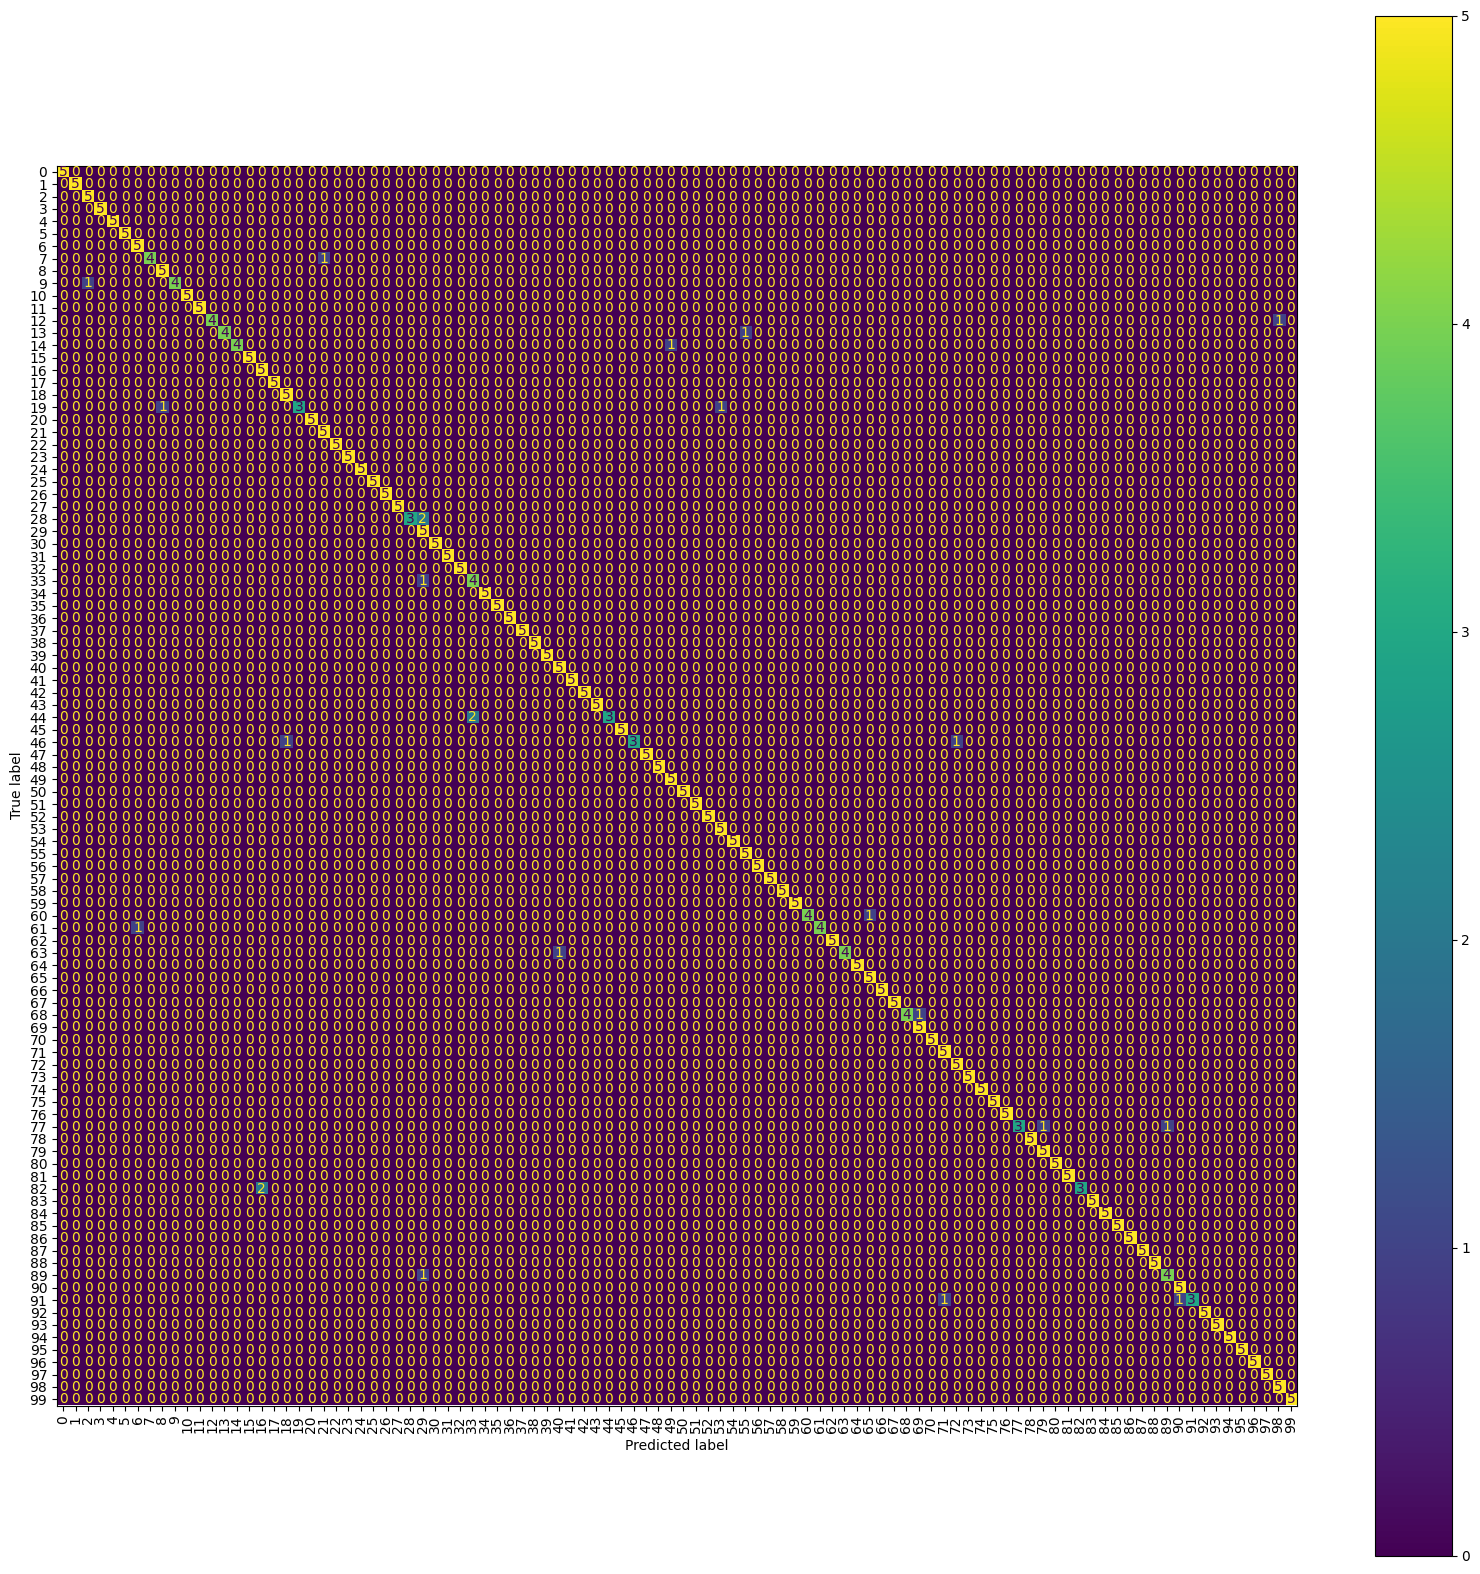

In [38]:
cmp = ConfusionMatrixDisplay(conf_matrix)

# Create a new figure and axes with a specific size
fig, ax = plt.subplots(figsize=(20,20))

# Plot the confusion matrix on these axes
cmp.plot(ax=ax, xticks_rotation='vertical')

In [40]:
for i in range (conf_matrix.shape[0]):
    for j in range (conf_matrix.shape[0]):
        if conf_matrix[i][j] <=4 and i == j:
            print(SportsDictionary[i])

baseball
baton twirling
bmx
bobsled
bowling
cheerleading
figure skating pairs
frisbee
horseshoe pitching
hydroplane racing
parallel bar
pole climbing
pole vault
roller derby
sky surfing
steer wrestling
trapeze
ultimate
